首先安装 pytorch

colab.research.google.com 并没有自带 pytorch，执行环境重启之后之前安装的 pytorch 会丢失

如果执行 import torch 失败，重复执行下面这条命令

In [2]:
!pip install torch torchvision

    100% |████████████████████████████████| 484.0MB 24kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5c256000 @  0x7f1b35a901c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 14.5MB/s 
    100% |████████████████████████████████| 2.0MB 16.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


pytorch 首先是 tensor （n维数组）的计算库

In [0]:
import torch
x = torch.Tensor([1.0, 2.0, 3.0]) # vector (1d)
y = x ** x
y

tensor([  1.,   4.,  27.])

In [0]:
import torch
x = torch.Tensor([
    [1.0, 2.0, 3.0], 
    [1.0, 2.0, 3.0]
]) # matrix (2d)
y = x ** x
y

tensor([[  1.,   4.,  27.],
        [  1.,   4.,  27.]])

In [0]:
import torch
x = torch.Tensor([
    [[1.0], [2.0], [3.0]], 
    [[1.0], [2.0], [3.0]]
]) # tensor (more than 2d)
y = x ** x
y

tensor([[[  1.],
         [  4.],
         [ 27.]],

        [[  1.],
         [  4.],
         [ 27.]]])

相比 numpy 来说 pytorch 把类似的编程体验扩展到了 GPU 计算上。只需要调用 cuda 这个函数就可以了。

In [0]:
import torch
x = torch.Tensor([1.0, 2.0, 3.0]).cuda() # 这个运行在 GPU 上
y = x ** x
y

tensor([  1.,   4.,  27.], device='cuda:0')

pytorch 除了可以用来做 tensor 的运算之外，还可以对计算过程进行自动求导数（也就是梯度）

In [0]:
import torch
import matplotlib.pylab as plt

x = torch.Tensor([3.0])
x.requires_grad_(True) # Tensor 默认不追踪其的梯度
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([ 6.])

计算梯度出来的梯度可以用于梯度下降算法，其目的是把函数的结果往目标靠近。

比如 f(x) = y

为了把结果y向目标靠近，我们可以通过梯度计算去修改 x 或者修改 f。
下面我们看一下给定f的情况下，修改x的情况

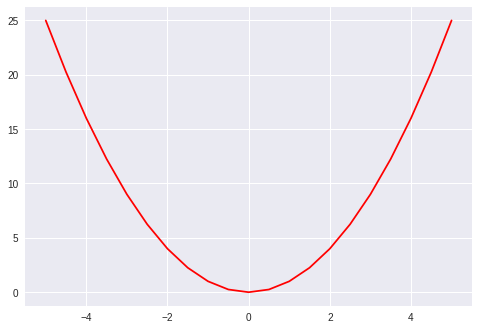

In [0]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-5, 5, 21)
y = x * x
plt.plot(x, y, 'r')

假设初始的情况是这样的

In [5]:
import torch

x = torch.Tensor([1.0])
y = x * x
target = torch.Tensor([10.0])
loss = torch.abs(y - target)
loss # 距离目标的距离

tensor([ 9.])

为了把 y 朝着目标 10 前进，需要计算当前的梯度

In [16]:
import torch

x = torch.Tensor([1.0])
x.requires_grad_(True)
y = x * x
target = torch.Tensor([10.0])
loss = torch.abs(y - target)
loss.backward()
x.grad # 梯度

tensor([-2.])

利用 x 的梯度，我们可以来更新 x 的值使得 f(x) 朝着目标 10 前进

In [9]:
import torch

x = torch.Tensor([1.0])
learning_rate = 0.1
gradient = torch.Tensor([-2.0])
x -= learning_rate * gradient
print('updated x', x)
y = x * x
print('updated y', y)

updated x tensor([ 1.2000])
updated y tensor([ 1.4400])


我们可以看到，利用gradient给出的方向，通过更新x，我们朝着y的目标前进了

把 x 和 y 画到原来的抛物线上

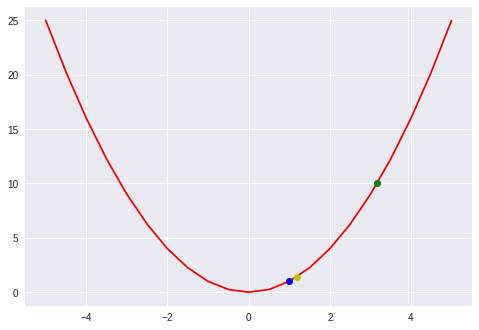

In [15]:
import numpy as np 
import math
import matplotlib.pylab as plt


x = np.linspace(-5, 5, 21)
y = x * x
plt.plot(x, y, 'r')
plt.plot(1.0, 1.0, 'bo') # 第一个点
plt.plot(1.2, 1.44, 'yo') # 第二个点
plt.plot(math.sqrt(10), 10, 'go') # 目标值

但是所谓梯度下降算法不是应该收敛到一个局部的最小值么？从这个曲线上目标点并不是一个局部的最小值啊。

这是因为我们实际优化的函数并不是 y = x * x

而是 loss = abs(x * x - 10)

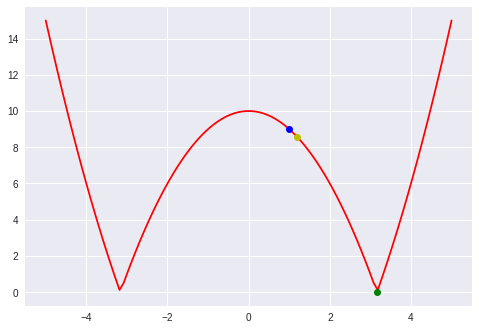

In [20]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-5, 5, 100)
y = np.abs(x * x - 10)
plt.plot(x, y, 'r')
plt.plot(1, abs(1 * 1 - 10),'bo') # 第一个点
plt.plot(1.2, abs(1.2 * 1.2 - 10),'yo')  # 第二个点
plt.plot(math.sqrt(10), 0, 'go') # 目标值

从上面的计算loss的函数曲线上就可以非常看清楚这个梯度下降算法的效果了

而且可以看到 loss 最小的点其实是两个。取决于初始的位置，我们可能收敛到的结果是右边的最小值，或者左边那个最小值。

重复多次前面的更新 x 的过程。我们可以得到近似的 x 值，收敛 loss 为近似到 0

In [29]:
import torch

x = torch.Tensor([1.0])
x.requires_grad_(True)
target = torch.Tensor([10.0])
learning_rate = 0.01

for epoch in range(101):
  y = x * x
  loss = torch.abs(target - y)
  if epoch % 10 == 0:
    print(x, y, loss)
  loss.backward()
  with torch.no_grad():
    x -= learning_rate * x.grad
    x.grad.zero_()

tensor([ 1.]) tensor([ 1.]) tensor([ 9.])
tensor([ 1.2190]) tensor([ 1.4859]) tensor([ 8.5141])
tensor([ 1.4859]) tensor([ 2.2080]) tensor([ 7.7920])
tensor([ 1.8114]) tensor([ 3.2810]) tensor([ 6.7190])
tensor([ 2.2080]) tensor([ 4.8754]) tensor([ 5.1246])
tensor([ 2.6916]) tensor([ 7.2446]) tensor([ 2.7554])
tensor([ 3.1524]) tensor([ 9.9374]) tensor(1.00000e-02 *
       [ 6.2606])
tensor([ 3.1461]) tensor([ 9.8977]) tensor([ 0.1023])
tensor([ 3.1398]) tensor([ 9.8582]) tensor([ 0.1418])
tensor([ 3.1335]) tensor([ 9.8188]) tensor([ 0.1812])
tensor([ 3.1272]) tensor([ 9.7796]) tensor([ 0.2204])


我们可以看到loss不断变小。然后在0的附近徘徊